# PRODIGY INFOTECH

## Predict survival on the Titanic and get familiar

In [1]:
# import all library to requreted
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train Data work 

In [3]:
# loading the data from csv file to pandas dataframs
df_tr= pd.read_csv('train.csv')
df_tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# number of row and columns
df_tr.shape

(891, 12)

In [5]:
# gatting some information in DataFram
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# checking the number of mission value in each columns
df_tr.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Handly the mission value
# Ḍrop the "Cabin" columns from the datafram
df_tr.drop(columns='Cabin',inplace=True)

In [8]:
# Ḍrop the "Ticket" columns from the datafram
df_tr.drop(columns='Ticket',inplace=True)

In [9]:
# replacing the mission value in "Age" columns with mean value
df_tr['Age'].fillna(df_tr['Age'].mean(),inplace=True)

In [10]:
# finding the mode value of "Embarked" columns
df_tr['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
df_tr['Embarked'].mode()[0]

'S'

In [12]:
# replacing the mission value in "Embarked" columns with mode value
df_tr['Embarked'].fillna(df_tr['Embarked'].mode()[0],inplace=True)

In [13]:
# Again checking the number of mission value in each columns
df_tr.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [14]:
# Data analysic 
# gatting some statistical measures about the data
df_tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# finding the no of people Survived and not survived
df_tr['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

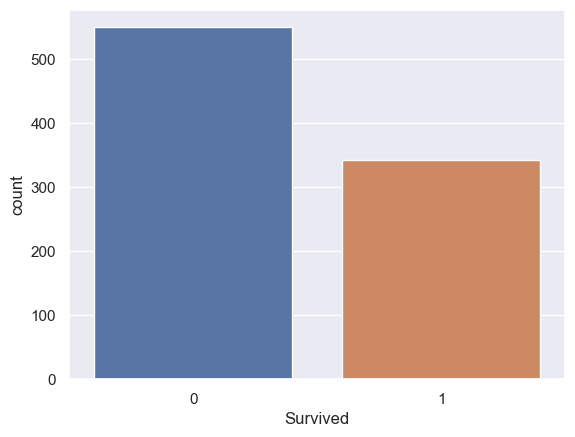

In [16]:
# making a count plot for surivied column 
sns.set()
sns.countplot("Survived",data=df_tr)

In [17]:
# finding the no of people male and not female
df_tr['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

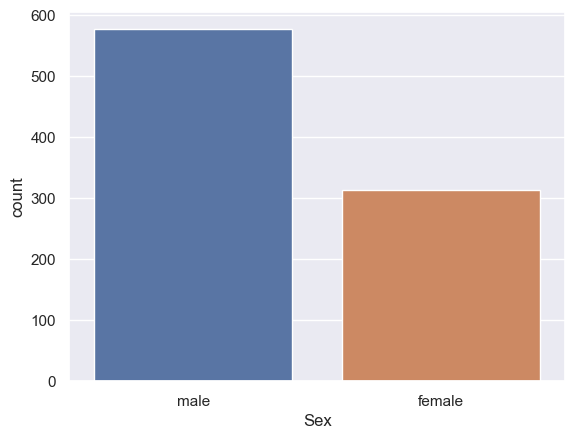

In [18]:
# making a count plot for Sex column
sns.countplot("Sex",data=df_tr)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

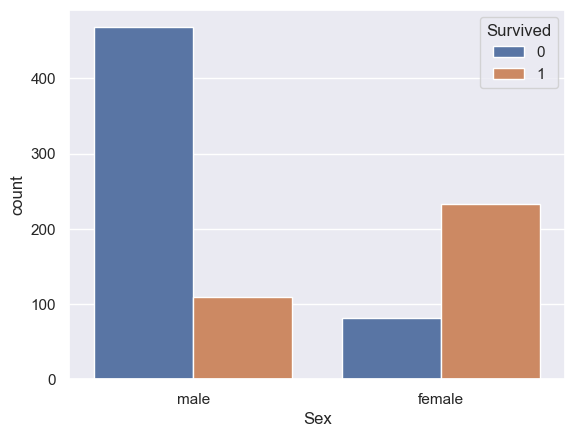

In [19]:
# no of survived Gender base
sns.countplot('Sex',hue='Survived',data=df_tr)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

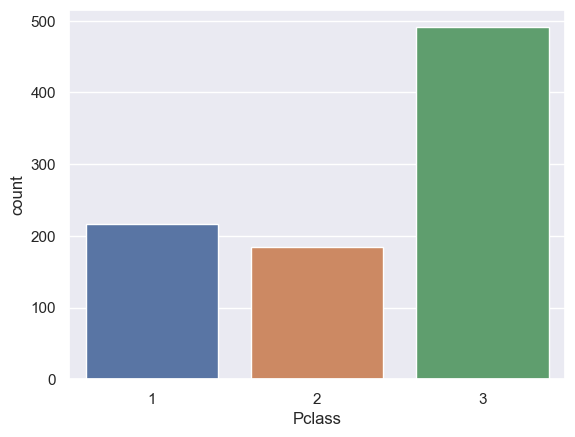

In [20]:
# making a count plot for Pclass column
sns.countplot("Pclass",data=df_tr)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

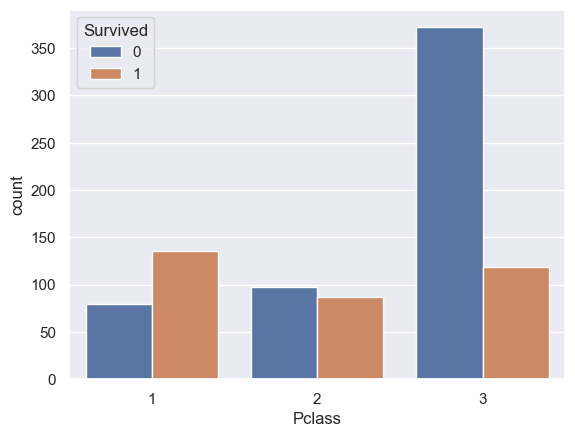

In [21]:
# no of survived Pclass base
sns.countplot('Pclass',hue='Survived',data=df_tr)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

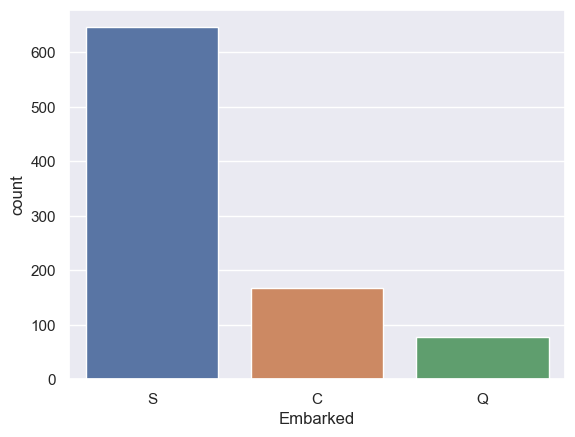

In [22]:
# making a count plot for Embarked column
sns.countplot("Embarked",data=df_tr)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

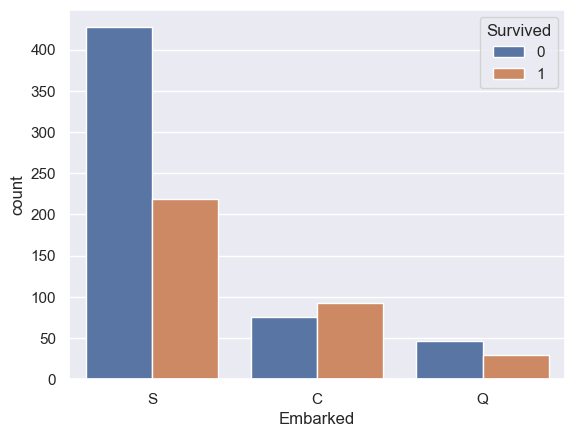

In [23]:
# no of survived Embarked base
sns.countplot('Embarked',hue='Survived',data=df_tr)

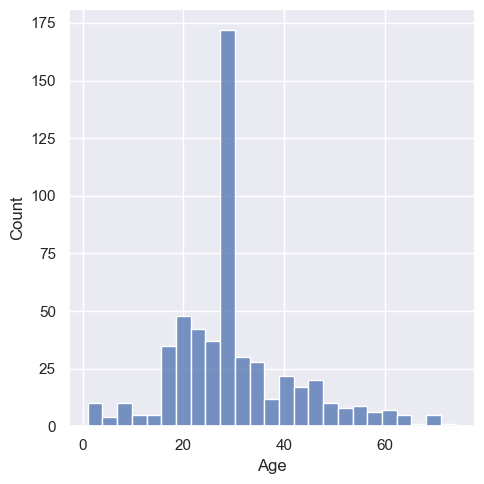

In [24]:
sns.displot(df_tr['Age'][df_tr['Survived']==0])

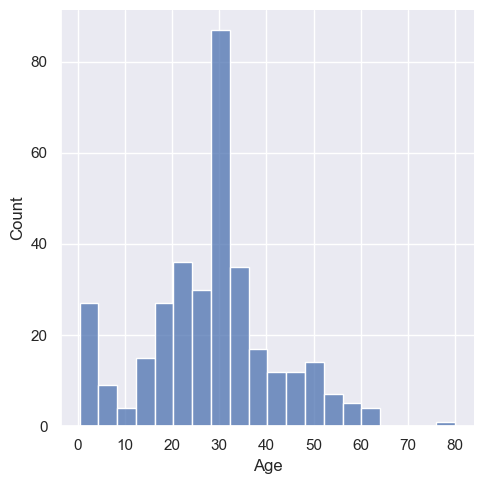

In [25]:
sns.displot(df_tr['Age'][df_tr['Survived']==1])

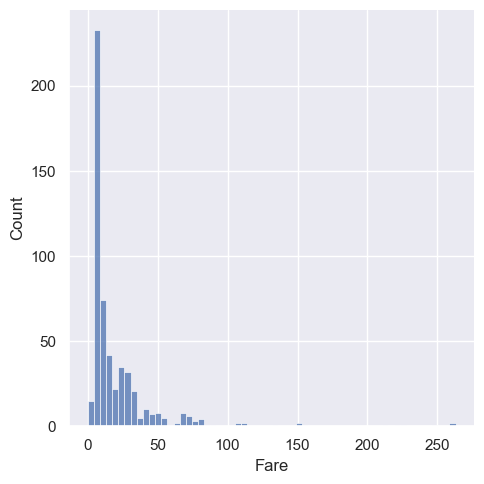

In [26]:
sns.displot(df_tr['Fare'][df_tr['Survived']==0])

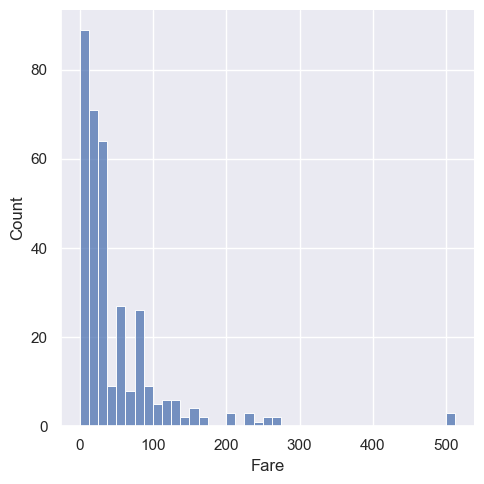

In [27]:
sns.displot(df_tr['Fare'][df_tr['Survived']==1])

In [28]:
# checking parcentage of people Survived in pclass
df_tr.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [29]:
# checking parcentage of people Survived in gendar wise
df_tr.groupby(['Sex'])['Survived'].mean()    # 1 = male , 2 = female

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [30]:
# Add sibsp and Parch bath columns   
df_tr['Family']=df_tr['SibSp'] + df_tr['Parch'] + 1

In [31]:
df_tr['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [32]:
# checking parcentage of people Survived in Family(sibsp + parch)
df_tr.groupby(['Family'])['Survived'].mean() 

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [33]:
def cal(no):
    if no == 1:
        return "Along"
    elif no>1 and no<5:
        return "Medium"
    else:
        return "Large"

In [34]:
df_tr['Family_size']=df_tr['Family'].apply(cal)

In [35]:
df_tr.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,10.5000,S,1,Along
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,13.0000,S,1,Along
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,15.8500,S,2,Medium
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,90.0000,Q,2,Medium
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C,1,Along


In [36]:
# Drop columns
df_tr.drop(columns=['SibSp','Parch','Family','PassengerId','Name'],inplace=True)

In [38]:
df_tr.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
173,0,3,male,21.000000,7.9250,S,Along
600,1,2,female,24.000000,27.0000,S,Medium
231,0,3,male,29.000000,7.7750,S,Along
406,0,3,male,51.000000,7.7500,S,Along
552,0,3,male,29.699118,7.8292,Q,Along


In [39]:
df_tr.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
159,0,3,male,29.699118,69.5500,S,Large
600,1,2,female,24.000000,27.0000,S,Medium
691,1,3,female,4.000000,13.4167,C,Medium
61,1,1,female,38.000000,80.0000,S,Along
371,0,3,male,18.000000,6.4958,S,Medium


In [40]:
# checking parcentage of people Survived in Embarked
df_tr.groupby(['Embarked'])['Survived'].mean()        # 0 = S , 1 = C  , 2 = Q 

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [41]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   Family_size  891 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


In [42]:
# Encoding categorical columns
df_tr['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [43]:
# Encoding categorical columns
df_tr['Family_size'].value_counts()

Along     537
Medium    292
Large      62
Name: Family_size, dtype: int64

In [45]:
df_tr['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
# Replacing all categorical columns 
df_tr.replace({'Sex':{'male':1,'female':2},'Embarked':{'S':0,'C':1,'Q':2},'Family_size':{'Along':0,'Medium':1,'Large':2}},inplace=True)

In [47]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    int64  
 6   Family_size  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


# Test Data work 

In [48]:
# loading the data from csv file to pandas dataframs
df_ts= pd.read_csv('test.csv')
df_ts

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [49]:
# checking no of columns and row
df_ts.shape

(418, 11)

In [50]:
# gatting some information in DataFram
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [51]:
# Add sibsp and Parch bath columns   
df_ts['Family']=df_ts['SibSp'] + df_ts['Parch'] + 1

In [52]:
df_ts['Family'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: Family, dtype: int64

In [53]:
df_ts['Family_size']=df_ts['Family'].apply(cal)

In [54]:
df_ts.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_size
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,1,Along
283,1175,3,"Touma, Miss. Maria Youssef",female,9.0,1,1,2650,15.2458,NaN,C,3,Medium
73,965,1,"Ovies y Rodriguez, Mr. Servando",male,28.5,0,0,PC 17562,27.7208,D43,C,1,Along
37,929,3,"Cacic, Miss. Manda",female,21.0,0,0,315087,8.6625,NaN,S,1,Along
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,2,Medium


In [56]:
df_ts.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_size
109,1001,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0000,F,S,1,Along
91,983,3,"Pedersen, Mr. Olaf",male,NaN,0,0,345498,7.7750,NaN,S,1,Along
104,996,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.0,1,1,2625,8.5167,NaN,C,3,Medium
160,1052,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,1,Along
400,1292,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,1,Along


In [57]:
# Storing "PassengerId" 
PassengerId=df_ts['PassengerId'].values

In [58]:
PassengerId

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [60]:
df_ts.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_size
330,1222,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.7500,NaN,S,3,Medium
370,1262,2,"Giles, Mr. Edgar",male,21.0,1,0,28133,11.5000,NaN,S,2,Medium
386,1278,3,"Aronsson, Mr. Ernst Axel Algot",male,24.0,0,0,349911,7.7750,NaN,S,1,Along
134,1026,3,"Dintcheff, Mr. Valtcho",male,43.0,0,0,349226,7.8958,NaN,S,1,Along
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,Along


In [61]:
# checking null value in eatch columns 
df_ts.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family           0
Family_size      0
dtype: int64

In [62]:
# Handly the mission value
# Ḍrop the "Cabin" ,'Ticket','PassengerId','Name','SibSp','Parch','Family'columns from the datafram
df_ts.drop(columns=['Cabin','Ticket','PassengerId','Name','SibSp','Parch','Family'],inplace=True)

In [64]:
# replacing the mission value in "Age" columns with mean value
df_ts['Age'].fillna(df_ts['Age'].mean(),inplace=True)

In [65]:
# finding the mode value of "Fare" columns
df_ts['Fare'].mode()

0    7.75
Name: Fare, dtype: float64

In [66]:
# replacing the mission value in "Fare" columns with mode value
df_ts['Fare'].fillna(df_ts['Fare'].mode()[0],inplace=True)

In [67]:
# After fill null value checking
df_ts.isna().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [68]:
# Encoding categorical columns
df_ts['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [69]:
df_ts['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [70]:
df_ts['Family_size'].value_counts()

Along     253
Medium    145
Large      20
Name: Family_size, dtype: int64

In [71]:
# Replacing all categorical columns 
df_ts.replace({'Sex':{'male':1,'female':2},'Embarked':{'S':0,'C':1,'Q':2},'Family_size':{'Along':0,'Medium':1,'Large':2}},inplace=True)

In [72]:
# Replacing categorical columns 
# df_ts.replace({'Family_size':{'Along':0,'Medium':1,'Large':2}},inplace=True)

In [73]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    int64  
 2   Age          418 non-null    float64
 3   Fare         418 non-null    float64
 4   Embarked     418 non-null    int64  
 5   Family_size  418 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


# Splitting the data into trainning data and test data

In [74]:
x = df_tr.iloc[:,1:].values
y = df_tr.iloc[:,0].values

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# Using DecisionTreeClassifier

In [76]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
y_pred=model.predict(x_test)

In [78]:
accuracy_score(y_pred,y_test)

0.7821229050279329

# Using LogisticRegression

In [79]:
try1=LogisticRegression()
try1.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
try_pred=try1.predict(x_test)

In [81]:
accuracy_score(try_pred,y_test)

0.8156424581005587

In [82]:
x_final=df_ts.iloc[:,:].values

In [83]:
y_final=model.predict(x_final)

In [84]:
y_final.shape

(418,)

In [85]:
PassengerId.shape

(418,)

In [86]:
# create empty DataFrame 
final = pd.DataFrame()

In [87]:
final['PassengerId']=PassengerId
final['Survived']= y_final

In [88]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [89]:
# create today work csv file
final.to_csv('submit_file.csv',index=False)

In [90]:
# Read today wrok ready file
work_file = pd.read_csv('submit_file.csv')
work_file

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Thank you